In [5]:
import matplotlib.pyplot as py
import seaborn as sb
import numpy as np
import pandas as pd
%matplotlib inline

In [6]:
#datasets builtin seaborn library 
df=sb.load_dataset('tips')

In [7]:
'''The dataset contains tips data from different customers females and males smokers and non smokers from days Thursday to
Sunday, dinner or lunch and from different tables size We want to predict how much tip the waiter will earn based 
on other parameters'''

df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


In [9]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [10]:
# only numeric data would be considered here other will get ignored.
df.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


# Data analysis with Pandas

In [11]:
df.groupby('day').count()

,total_bill,tip,sex,smoker,time,size
day,,,,,,
Thur,62,62,62,62,62,62
Fri,19,19,19,19,19,19
Sat,87,87,87,87,87,87
Sun,76,76,76,76,76,76


In [12]:
# find out the best day to work, getting more tips. maximum tips (sum and percents)

df2=df.groupby('day').sum() # sum per day
df2.drop('size',inplace=True,axis=1) # sum of size column is not relevant
df2['percent'] = df2['tip']/df2['total_bill']*100 # add percents
df2

,total_bill,tip,percent
day,,,
Thur,1096.33,171.83,15.673201
Fri,325.88,51.96,15.944519
Sat,1778.40,260.40,14.642375
Sun,1627.16,247.39,15.203791


In [13]:
df3=df.groupby('smoker').sum()
df3['percent'] = df3['tip']/df3['total_bill']*100
df3

,total_bill,tip,size,percent
smoker,,,,
Yes,1930.34,279.81,224,14.495374
No,2897.43,451.77,403,15.592094


In [14]:
#Lets group by day and table size:
df4= df.groupby(['day','size']).sum()
df4['percent'] = df4['tip']/df4['total_bill']*100
df4.dropna() # drop null rows

total_bill     tip    percent
day  size                               
Thur 1          10.07    1.83  18.172790
     2         727.53  117.24  16.114799
     3          76.64   10.77  14.052714
     4         149.75   21.09  14.083472
     5          41.19    5.00  12.138869
     6          91.15   15.90  17.443774
Fri  1           8.58    1.92  22.377622
     2         261.15   42.31  16.201417
     3          15.98    3.00  18.773467
     4          40.17    4.73  11.774956
Sat  1          10.32    2.00  19.379845
     2         892.37  133.43  14.952318
     3         459.17   68.36  14.887732
     4         388.39   53.61  13.803136
     5          28.15    3.00  10.657194
Sun  2         684.84  109.86  16.041703
     3         332.76   46.81  14.067196
     4         480.39   73.58  15.316722
     5          81.00   12.14  14.987654
     6          48.17    5.00  10.379905

In [ ]:
#smaller tables are better to serve

# Visualization with Seaborn

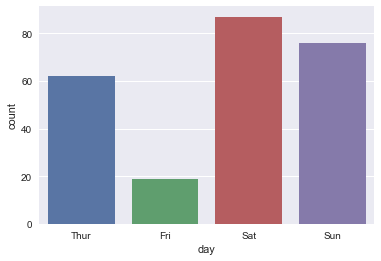

In [15]:
#Tables per day
ax = sb.countplot(x='day' ,data=df)


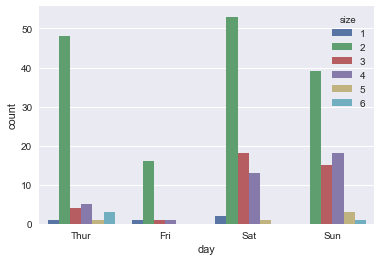

In [16]:
sb.countplot(x='day',hue='size' ,data=df)


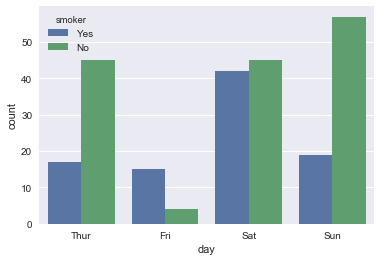

In [17]:
sb.countplot(x='day',hue='smoker' ,data=df)


# Transform and clean the data

##### Using replace: 

In [18]:
df.replace({ 'sex': {'Male':0 , 'Female':1} , 'smoker' : {'No': 0 , 'Yes': 1}} ,inplace=True)
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,1,0,Sun,Dinner,2
1,10.34,1.66,0,0,Sun,Dinner,3
2,21.01,3.50,0,0,Sun,Dinner,3
3,23.68,3.31,0,0,Sun,Dinner,2
4,24.59,3.61,1,0,Sun,Dinner,4


##### Using dummy variables:

In [19]:
days=pd.get_dummies(df['day'])
days.sample(5)

,Thur,Fri,Sat,Sun
156,0,0,0,1
66,0,0,1,0
229,0,0,1,0
36,0,0,1,0
152,0,0,0,1


In [20]:

days=pd.get_dummies(df['day'],drop_first=True)
days.sample(6)


,Fri,Sat,Sun
30,0,1,0
105,0,1,0
198,0,0,0
240,0,1,0
219,0,1,0
33,0,1,0


In [21]:
days=pd.get_dummies(df['day'],drop_first=True)
df = pd.concat([df,days],axis=1)
times=pd.get_dummies(df['time'],drop_first=True)
df = pd.concat([df,times],axis=1)
df.drop(['day','time'],inplace=True,axis=1)
df.head()

,total_bill,tip,sex,smoker,size,Fri,Sat,Sun,Dinner
0,16.99,1.01,1,0,2,0,0,1,1
1,10.34,1.66,0,0,3,0,0,1,1
2,21.01,3.50,0,0,3,0,0,1,1
3,23.68,3.31,0,0,2,0,0,1,1
4,24.59,3.61,1,0,4,0,0,1,1


# Building our Machine Learning model

In [22]:
X = df[['sex','smoker','size','Fri','Sat','Sun','Dinner']]
Y = df[['tip']]

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test , y_train , y_test = train_test_split(X,Y,test_size=0.25,random_state=26)

In [24]:
model = LinearRegression(normalize=True)
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [25]:
predictions=model.predict(X_test)

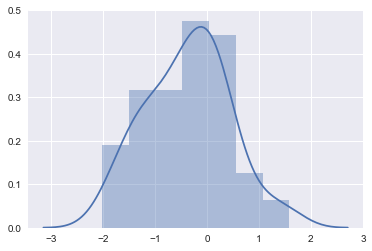

In [26]:
sb.distplot(y_test-predictions)

In [27]:
myvals = np.array([0,1,3,1,0,0,0]).reshape(1,-1)
model.predict(myvals)

array([[ 3.12444493]])

In [31]:
myvals = np.array([0,1,3,1,0,0,1]).reshape(1,-1)
model.predict(myvals)

array([[ 3.73414562]])